In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)

In [3]:
top_jobs=df['job_title_short'].value_counts().head(3).index
top_jobs

Index(['Data Analyst', 'Data Engineer', 'Data Scientist'], dtype='object', name='job_title_short')

In [7]:
df_exploded= df.explode('job_skills')
skill_count=df_exploded.groupby(['job_title_short','job_skills']).size()
df_skill_count=skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


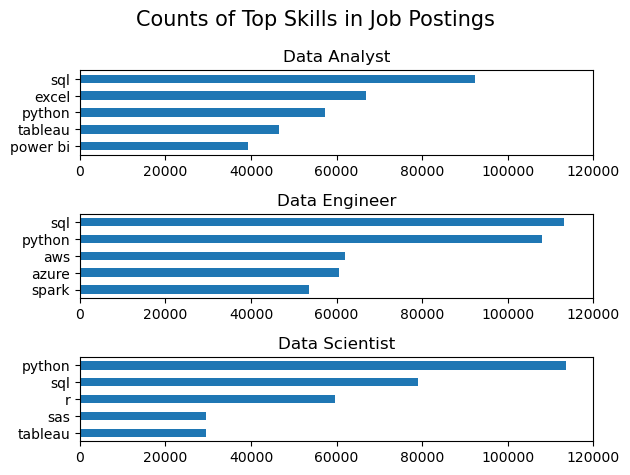

In [13]:
fig, ax=plt.subplots(len(top_jobs),1)

for i,job in enumerate(top_jobs):
    df_plot=df_skill_count[df_skill_count['job_title_short']==job].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

plt.show()

# Job Benifit Analysis 

<Axes: ylabel='count'>

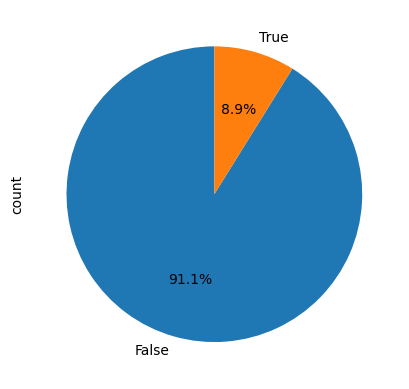

In [14]:
df['job_work_from_home'].value_counts().plot(kind='pie',labels=['False','True'],autopct='%1.1f%%',startangle=90)

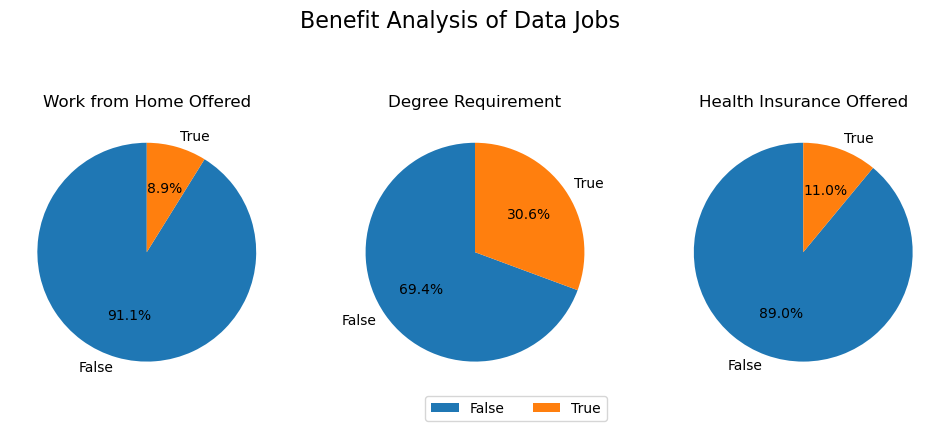

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig1, ax=plt.subplots(1,3)
fig1.set_size_inches(12,5)

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),labels=['False','True'],autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)

fig1.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(-0.55, 0), ncol=2)
plt.show()